Author: Muhammad Sholih Fajri

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from scipy.stats import t
from scipy.stats import ttest_1samp

### Load Dataset

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### Cek info/summary

Cek duplicates

In [3]:
print(df.shape)
print(df.drop_duplicates().shape)

(1338, 7)
(1337, 7)


Nan values

In [4]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Deskripsi

In [6]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


## Descriptive Statistic

#### Rata-rata Umur

C:\Users\Acer\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


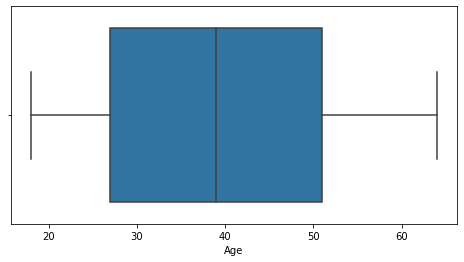

In [7]:
plt.figure(figsize=(8,4))

sns.boxplot(df['age'])
plt.xlabel('Age')
plt.show()

In [8]:
print(f'Rata-rata umur pada dataset adalah\t: {np.mean(df["age"])}')

Rata-rata umur pada dataset adalah	: 39.20702541106129


#### Rata-rata BMI perokok

C:\Users\Acer\miniconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


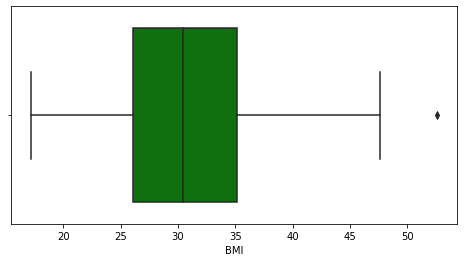

In [9]:
plt.figure(figsize=(8,4))

sns.boxplot(df[df['smoker']=='yes']['bmi'], color='g')
plt.xlabel('BMI')
plt.show()

In [10]:
print(f'Rata-rata BMI orang yang merokok adalah\t: {np.mean(df[df["smoker"]=="yes"]["bmi"])}')

Rata-rata BMI orang yang merokok adalah	: 30.708448905109503



#### Variance

In [11]:
df.groupby('smoker').agg({'charges':'var'}).rename(columns={'charges':'variance_charges'})

,variance_charges
smoker,
no,3.592542e+07
yes,1.332073e+08


Variansi tagihan kesehatan antara perokok dan non-perokok berbeda. Variansi tagihan kesehatan pada perokok lebih tinggi dibangin non-perokok

#### Rata-rata umur perokok berdasarkan gender

In [12]:
df[df['smoker']=='yes'].groupby('sex').agg({'age':'mean'}).rename(columns={'age':'mean_age'})

,mean_age
sex,
female,38.608696
male,38.446541


Rata-rata umur perokok perempuan sedikit lebih tinggi dari perokok laki-laki

#### Rata-rata tagihan perokok dan non-perokok

In [13]:
df.groupby('smoker').agg({'charges':'mean'}).rename(columns={'charges':'mean_charges'})

,mean_charges
smoker,
no,8434.268298
yes,32050.231832


Rata-rata tagihan kesehatan perokok lebih tinggi dari tagihan non-perokok

## Discrete Variables

### Proporsi perokok dan non-perokok

In [14]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

Pada data, jumlah non-perokok lebih banyak dari jumlah perokok

### Proporsi jumlah orang per region

In [15]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

Region southeast memiliki jumlah orang yang paling banyak, sementara region lain hampir sama jumlahnya.

### Tagihan berdasarkan gender

In [16]:
df.groupby('sex').agg({'charges':['sum','mean']})

charges              
                 sum          mean
sex                               
female  8.321061e+06  12569.578844
male    9.434764e+06  13956.751178

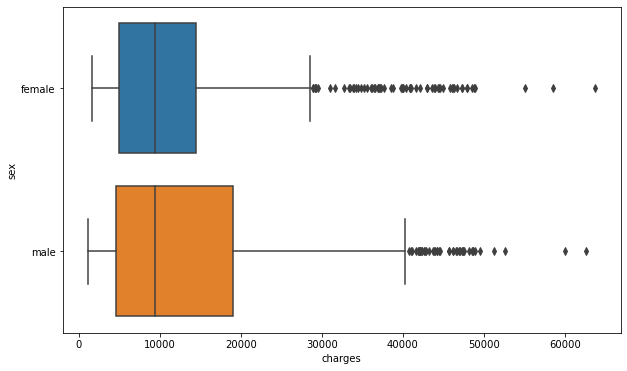

In [17]:
plt.figure(figsize=(10,6))

ax = plt.axes()

sns.boxplot(x='charges',y='sex',data=df,ax=ax)

plt.show()

### Peluang perempuan jika dia perokok

In [18]:
n_smoker = len(df[df['smoker']=='yes'])
n_female_smoker = len(df[(df['smoker']=='yes') & (df['sex']=='female')])

p_female_given_smoker = n_female_smoker / n_smoker

print(f'Peluang perempuan jika dia perokok\t {round(p_female_given_smoker,2)}')

Peluang perempuan jika dia perokok	 0.42


### Peluang laki-laki jika dia perokok

In [19]:
n_smoker = len(df[df['smoker']=='yes'])
n_male_smoker = len(df[(df['smoker']=='yes') & (df['sex']=='male')])

p_male_given_smoker = n_male_smoker / n_smoker

print(f'Peluang laki-laki jika dia perokok\t {round(p_male_given_smoker,2)}')

Peluang laki-laki jika dia perokok	 0.58


## Continuous Variable

### BMI > 25 dan tagihan kesehatan > 16.7k atau BMI < 25 dan tagihan kesehatan > 16.7k

In [20]:
n_charges = len(df[df['charges']>16700])
n_charges_bmi_higher25 = len(df[(df['bmi']>25) & (df['charges']>16700)])

p_charges_bmi_higher25 = n_charges_bmi_higher25 / n_charges

print(f'Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k\t: {round(p_charges_bmi_higher25, 2)}')

Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k	: 0.85


In [21]:
n_charges = len(df[df['charges']>16700])
n_charges_bmi_lower25 = len(df[(df['bmi']<25) & (df['charges']>16700)])

p_charges_bmi_lower25 = n_charges_bmi_lower25 / n_charges

print(f'Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k\t: {round(p_charges_bmi_lower25,2)}')

Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k	: 0.15


Peluang seseorang dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k lebih besar dari seseorang dengan BMI di bawah 25 dengan tagihan kesehatan di atas 16.7k

### Perokok dengan BMI > 25 dan tagihan kesehatan > 16.7k atau non-perokok dengan BMI > 25 dan tagihan kesehatan > 16.7k

In [22]:
n_charges = len(df[(df['charges']>16700) & (df['bmi']>=25)])
n_charges_smoker_bmi_higher25 = len(df[(df['bmi']>=25) & (df['smoker']=='yes') 
                                       & (df['charges']>16700)])

p_charges_smoker_bmi_higher25 = n_charges_smoker_bmi_higher25 / n_charges

print(f'Peluang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k\t: {round(p_charges_smoker_bmi_higher25,2)}')

Peluang perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k	: 0.76


In [23]:
n_charges = len(df[(df['charges']>16700) & (df['bmi']>=25)])
n_charges_non_smoker_bmi_higher25 = len(df[(df['bmi']>=25) & (df['smoker']=='no') 
                                       & (df['charges']>16700)])

p_charges_non_smoker_bmi_higher25 = n_charges_non_smoker_bmi_higher25 / n_charges

print(f'Peluang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k\t: {round(p_charges_non_smoker_bmi_higher25,2)}')

Peluang non-perokok dengan BMI di atas 25 mendapatkan tagihan kesehatan di atas 16.7k	: 0.24


Peluang perokok dengan BMI di atas 25 untuk mendapatkan tagihan kesehatan di atas 16.7k lebih besar dari non-perokok dengan BMI di atas 25 mendapat tagihan kesehatan di atas 16.7k

## Korelasi Variabel

In [24]:
df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


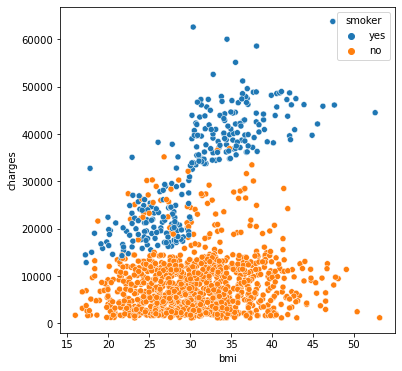

In [25]:
plt.figure(figsize=(6,6))

ax = plt.axes()

sns.scatterplot(x='bmi',y='charges',data=df,hue='smoker',ax=ax)

plt.show()

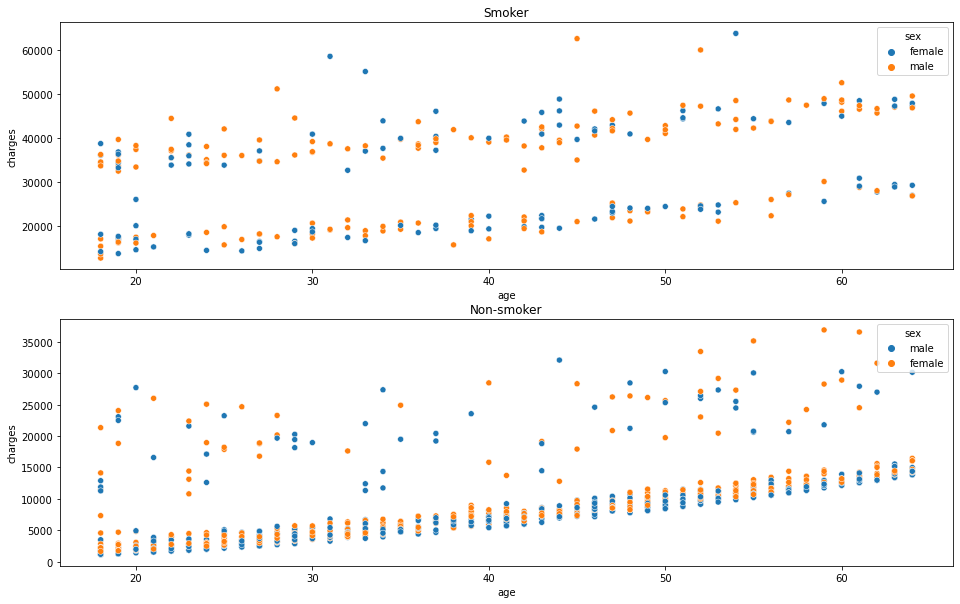

In [26]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))

sns.scatterplot(x='age',y='charges',data=df[df['smoker']=='yes'],hue='sex',ax=ax[0])
sns.scatterplot(x='age',y='charges',data=df[df['smoker']=='no'],hue='sex',ax=ax[1])

ax[0].set_title('Smoker')
ax[1].set_title('Non-smoker')

plt.show()

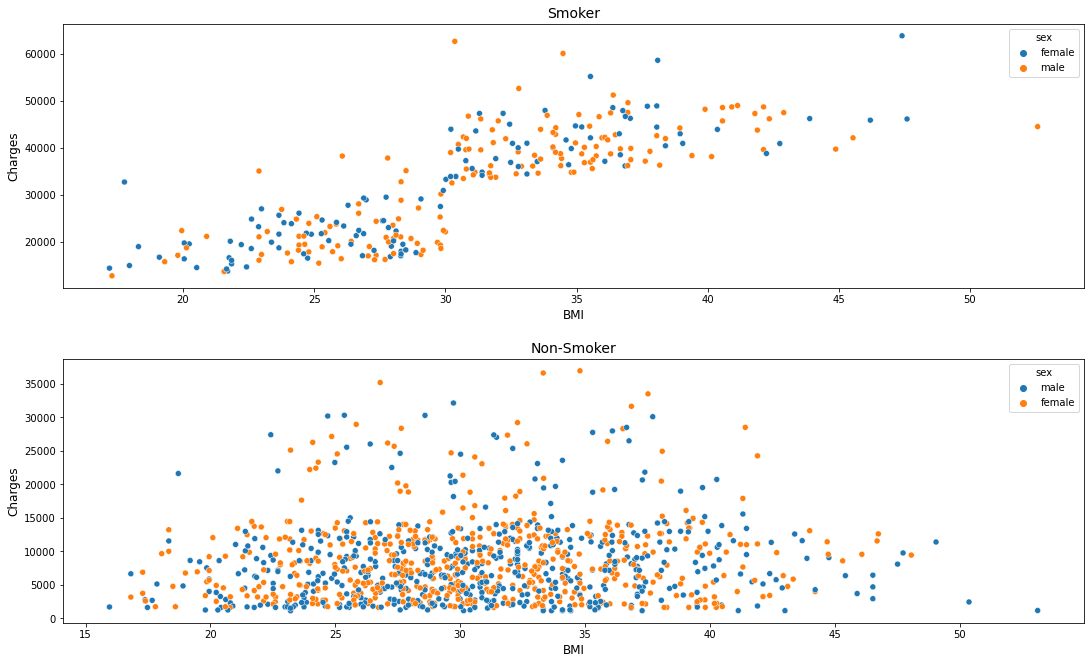

In [27]:
fig, ax = plt.subplots(2, 1, figsize=(16,10))
fig.tight_layout(pad=5)

sns.scatterplot(x='bmi',y='charges',data=df[df['smoker']=='yes'],hue='sex',ax=ax[0])
sns.scatterplot(x='bmi',y='charges',data=df[df['smoker']=='no'],hue='sex',ax=ax[1])

ax[0].set_title('Smoker', size=14)
ax[1].set_title('Non-Smoker', size=14)

ax[0].set_xlabel('BMI',size=12)
ax[0].set_ylabel('Charges',size=12)

ax[1].set_xlabel('BMI',size=12)
ax[1].set_ylabel('Charges',size=12)

plt.show()

## Uji Hipotesis

### Uji hipotesis tagihan kesehatan perokok dan non-perokok

H<sub>0</sub> = rata-rata tagihan kesehatan perokok lebih tinggi dari rata-rata tagihan kesehatan non-perokok

H<sub>1</sub> = rata-rata tagihan kesehatan perokok lebih rendah dari rata-rata tagihan kesehatan non-perokok

alpha = 0.05

In [28]:
# Menghitung statistik uji dan nilai p-value menggunakan library spicy
rata2_tagihan_non_perokok = np.mean(df[df['smoker']=='no']['charges'])
stat, pvalue = ttest_1samp(a=df[df['smoker']=='yes']['charges'], popmean=rata2_tagihan_non_perokok, alternative='less')
print(f'P-value menggunakan library spicy: {pvalue}')

P-value menggunakan library spicy: 1.0


Karena p-value lebih besar dari alpha, maka H<sub>0</sub> diterima atau dapat dikatakan bahwa rata-rata tagihan kesehatan perokok lebih tinggi dari rata-rata tagihan kesehatan non-perokok

### Uji hipotesis tagihan kesehatan BMI > 25 dan tagihan kesehatan BMI < 25

H<sub>0</sub> = rata-rata tagihan kesehatan orang dengan BMI >= 25 lebih tinggi dari rata-rata tagihan kesehatan orang dengab BMI < 25

H<sub>1</sub> = rata-rata tagihan kesehatan orang dengan BMI >= 25 lebih rendah dari rata-rata tagihan kesehatan orang dengab BMI < 25

In [29]:
# Menghitung statistik uji dan nilai p-value menggunakan library spicy
rata2_tagihan_bmi_lower25 = np.mean(df[df['bmi']<25]['charges'])
stat, pvalue = ttest_1samp(a=df[df['bmi']>=25]['charges'], popmean=rata2_tagihan_bmi_lower25, alternative='less')
print(f'P-value menggunakan library spicy: {pvalue}')

P-value menggunakan library spicy: 1.0


Karena p-value lebih besar dari alpha, maka H<sub>0</sub> diterima. Rata-rata tagihan kesehatan orang dengan BMI >= 25 lebih tinggi dari rata-rata tagihan kesehatan orang dengan BMI < 25

### Uji hipotesis tagihan kesehtan laki-laki dan perempuan

H<sub>0</sub> = rata-rata tagihan kesehatan laki-laki lebih tinggi dari rata-rata tagihan kesehatan perempuan

H<sub>1</sub> = rata-rata tagihan kesehatan laki-laki lebih rendah dari rata-rata tagihan kesehatan perempuan

In [30]:
# Menghitung statistik uji dan nilai p-value menggunakan library spicy
rata2_tagihan_perempuan = np.mean(df[df['sex']=='female']['charges'])
stat, pvalue = ttest_1samp(a=df[df['sex']=='male']['charges'], popmean=rata2_tagihan_perempuan, alternative='less')
print(f'P-value menggunakan library spicy: {pvalue}')

P-value menggunakan library spicy: 0.9972109499036678


Karena p-value lebih besar dari alpha, maka H<sub>0</sub> diterima. Rata-rata tagihan kesehatan laki-laki lebih tinggi dari rata-rata tagihan kesehatan perempuan